# Assignment 15 sep

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


Perform Data preprocessing on Titanic dataset
1.Data Collection.
   Please download the dataset from
   https://www.kaggle.com/datasets/yasserh/titanic-dataset

2.Data Preprocessing
    o	Import the Libraries.
    o	Importing the dataset.
    o	Checking for Null Values.
    o	Data Visualization.
    o	Outlier Detection
    o	Splitting Dependent and Independent variables
    o	Perform Encoding
    o	Feature Scaling.
    o	Splitting Data into Train and Test

## 1.Data Collection :
   

Data Set is collected from the kaggle  website

## 2.Data Preprocessing :

### Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the DataSet

In [4]:
df=pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Checking for Null Values

In [7]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
print("Null percentage in columns : ")
for i in df.columns:
    c=df[i].count()
    n=df[i].isnull().sum()
    print(i," : ",(n/(n+c)) * 100)

Null percentage in columns : 
PassengerId  :  0.0
Survived  :  0.0
Pclass  :  0.0
Name  :  0.0
Sex  :  0.0
Age  :  19.865319865319865
SibSp  :  0.0
Parch  :  0.0
Ticket  :  0.0
Fare  :  0.0
Cabin  :  77.10437710437711
Embarked  :  0.22446689113355783


In [ ]:
df.shape

(891, 12)

In [ ]:
df["Age"].fillna(df["Age"].median(),inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

In [ ]:
print(df["Age"].isnull().any())
print(df["Embarked"].isnull().any())

False
False


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print(df.shape)

(891, 12)


In [ ]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool

### Data Visualization

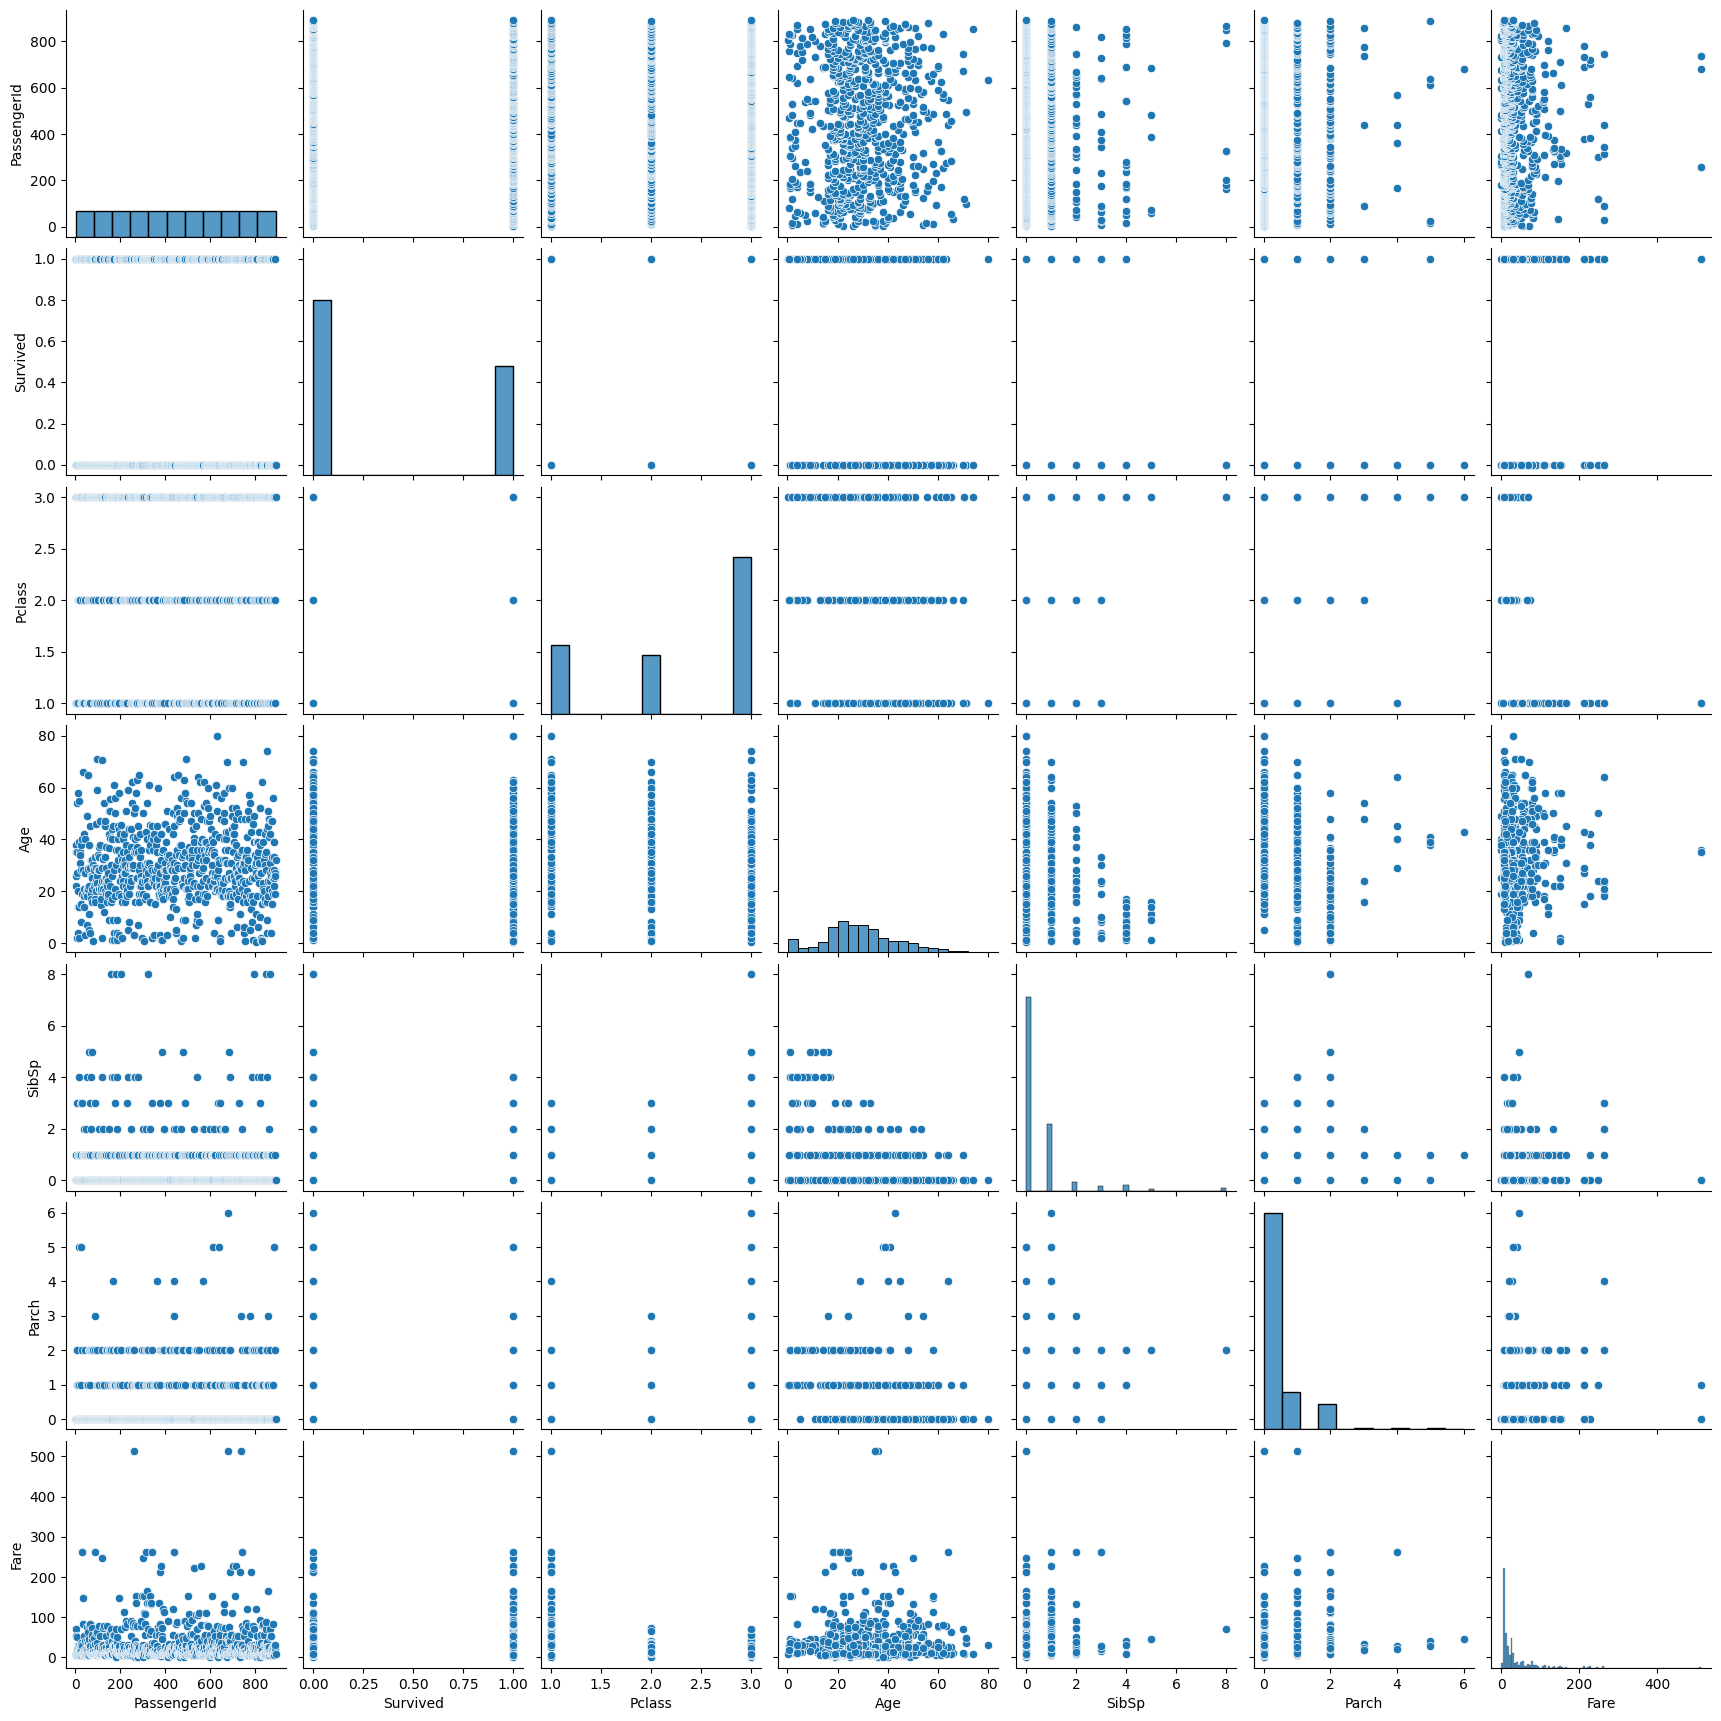

In [9]:
sns.pairplot(df)

<Axes: xlabel='Embarked', ylabel='Age'>

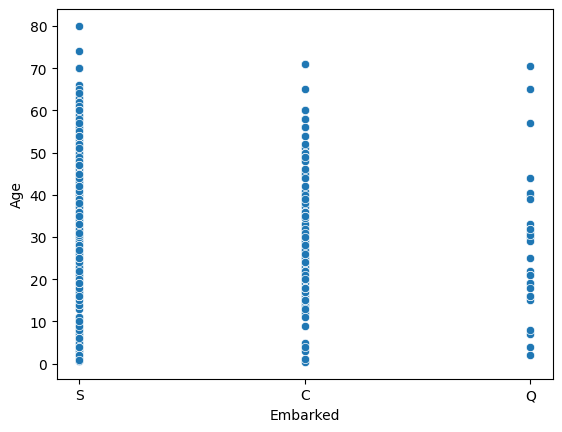

In [10]:
sns.scatterplot(x="Embarked",y="Age",data=df)

<Axes: xlabel='Sex', ylabel='Survived'>

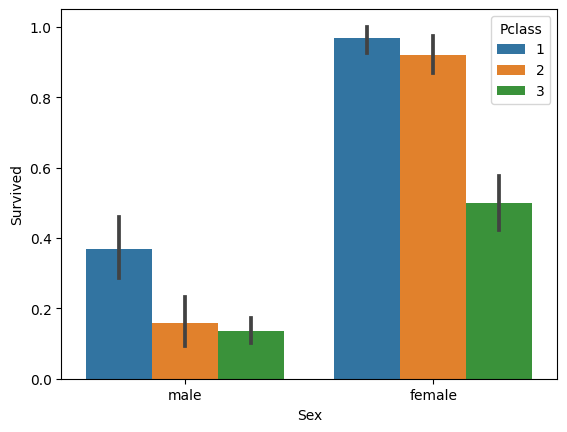

In [11]:
sns.barplot(x="Sex",y="Survived",data=df,hue="Pclass")

<Axes: xlabel='Sex', ylabel='Survived'>

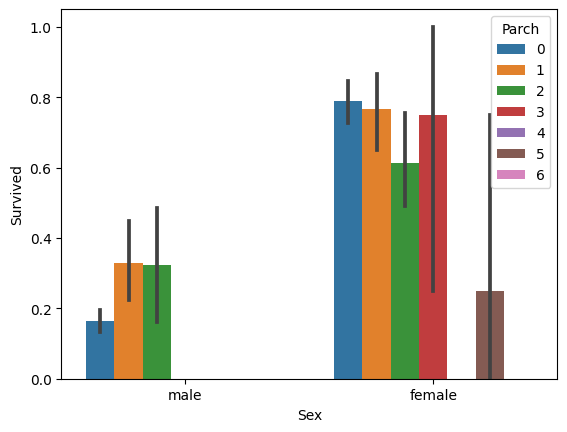

In [12]:
sns.barplot(x="Sex",y="Survived",data=df,hue="Parch")

<Axes: xlabel='Sex', ylabel='SibSp'>

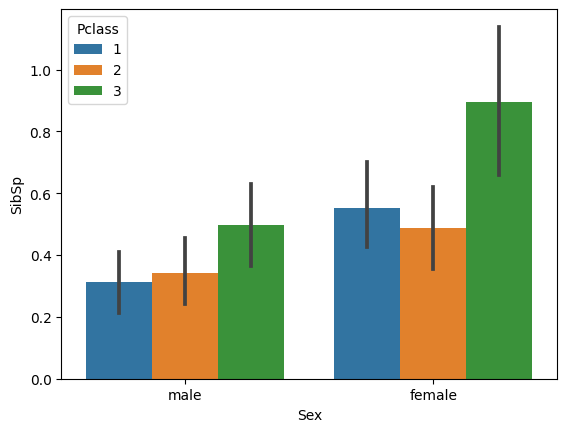

In [13]:
sns.barplot(x="Sex",y="SibSp",data=df,hue="Pclass")

<Axes: xlabel='Embarked', ylabel='Survived'>

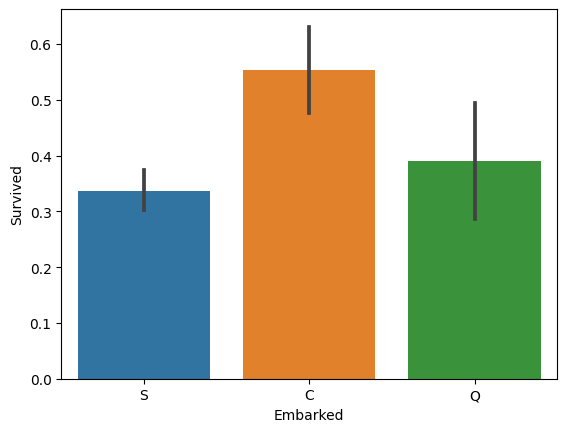

In [14]:
sns.barplot(x="Embarked",y="Survived",data=df)

<ipython-input-15-6525837c6049>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Survived"])


<Axes: xlabel='Survived', ylabel='Density'>

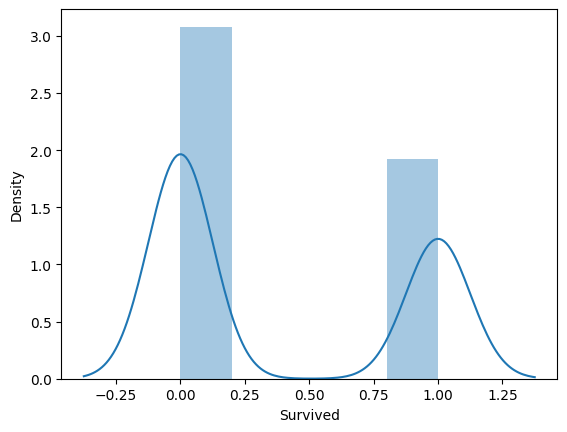

In [15]:
sns.distplot(df["Survived"])

In [16]:
corr=df.corr(numeric_only=True)
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

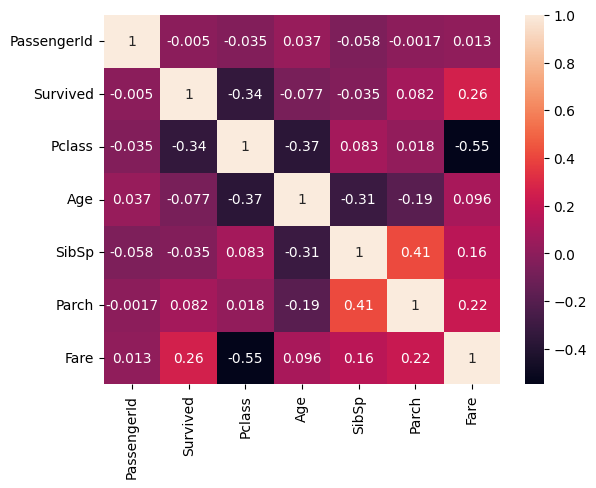

In [18]:
sns.heatmap(corr,annot=True)

### Outlier Detection

<Axes: >

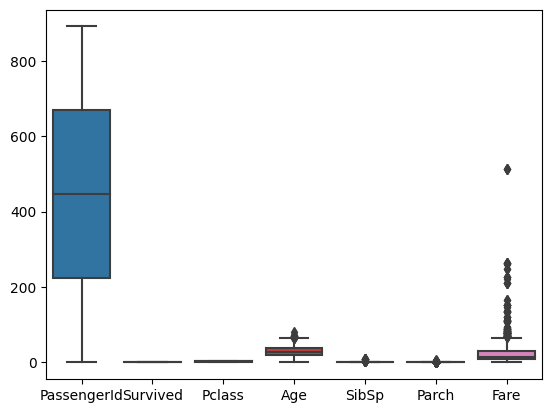

In [19]:
sns.boxplot(df)

<Axes: xlabel='Age', ylabel='Embarked'>

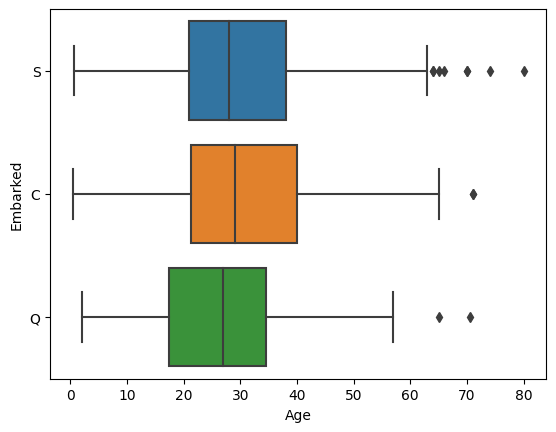

In [20]:
sns.boxplot(data=df,x="Age",y="Embarked")

<Axes: xlabel='Fare', ylabel='Embarked'>

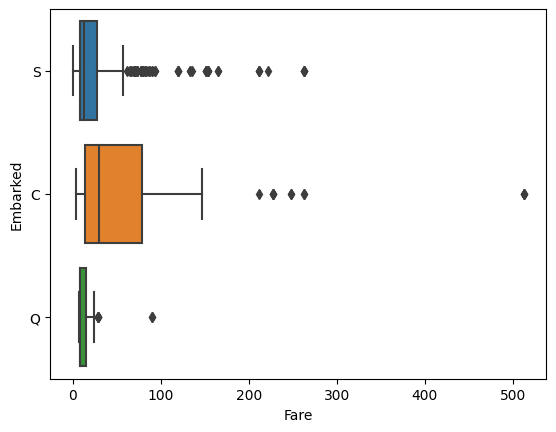

In [21]:
sns.boxplot(data=df,x="Fare",y="Embarked")

<Axes: >

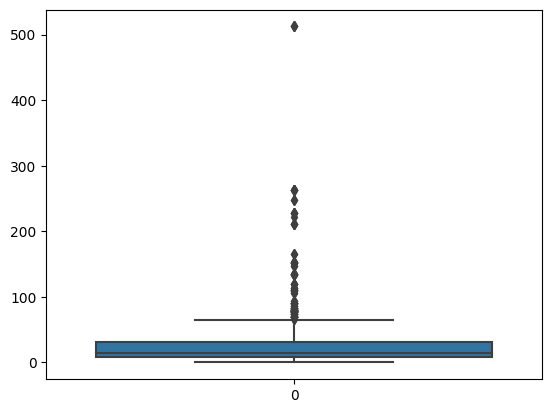

In [22]:
sns.boxplot(df["Fare"])

In [23]:
df["Age"].skew()

0.38910778230082704

In [24]:
df["Fare"].skew() # as skewnwss should be -1 to +1 is normal range but here we are having so much outliers and should be treated first

4.787316519674893

In [25]:
df["Fare"].median()

14.4542

In [26]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
width = 1.5
lower_limit = Q1 -(width*IQR)
upper_limit = Q3 + (width*IQR)
df['Fare']=np.where(df['Fare']>upper_limit,14.4542,np.where(df['Fare']<lower_limit,14.4542,df["Fare"]))

<Axes: >

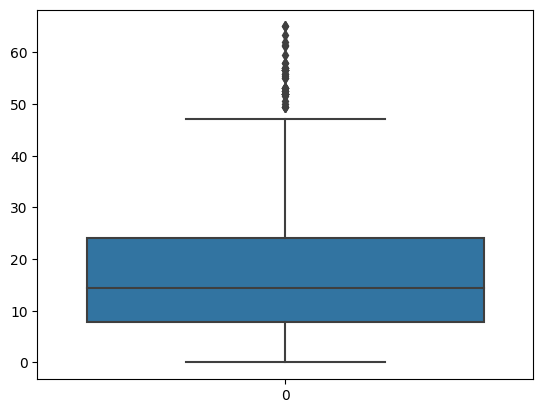

In [27]:
sns.boxplot(df["Fare"])

<Axes: >

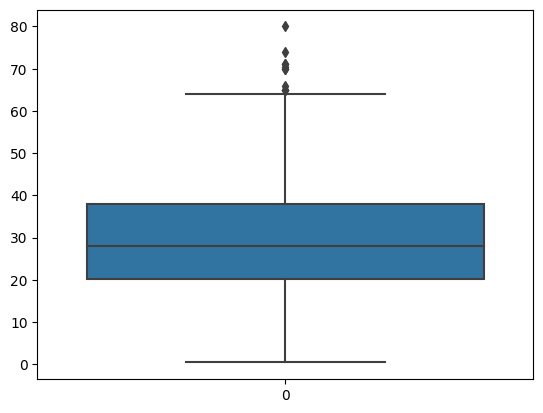

In [28]:
sns.boxplot(df.Age)

In [29]:
print(df.Age.median())
print(df.Age.shape)

28.0
(891,)


In [30]:
p=df["Age"].quantile(0.99)
p1=df['Age'].quantile(0.01)
df=df[df['Age']<=p]
df=df[df['Age']>=p1]

<Axes: >

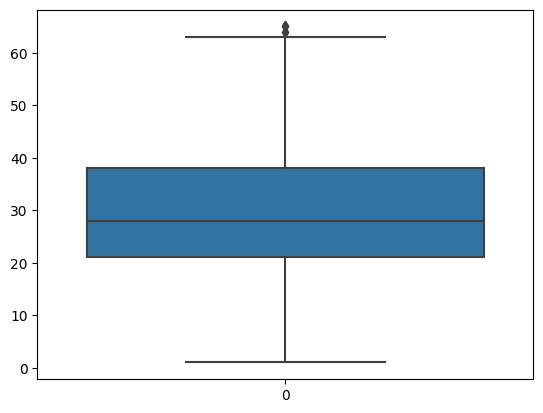

In [31]:
sns.boxplot(df.Age)

<Axes: >

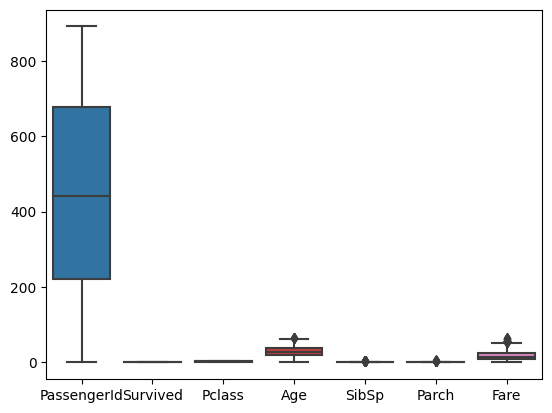

In [32]:
sns.boxplot(df)

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,14.4542,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
df.shape

(699, 12)

### Splitting Dependent and Independent variables

In [37]:
df.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,14.4542,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [38]:
X=df.iloc[:,1:]
y=df.iloc[:,:1]

In [39]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,14.4542,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [40]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [41]:
y=y.squeeze()

In [42]:
type(X)

pandas.core.frame.DataFrame

In [43]:
type(y)

pandas.core.series.Series

In [44]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Perform Encoding

In [45]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X["Sex"]=le.fit_transform(X["Sex"])
mapping1=dict(zip(le.classes_,range(len(le.classes_))))
X["Embarked"]=le.fit_transform(X["Embarked"])
mapping2=dict(zip(le.classes_,range(len(le.classes_))))


In [46]:
print("For Sex Column :",mapping1)
print("For Embarked Column :",mapping2)

For Sex Column : {'female': 0, 'male': 1}
For Embarked Column : {'C': 0, 'Q': 1, 'S': 2, nan: 3}


In [47]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,14.4542,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
885,3,0,39.0,0,5,29.1250,1
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
889,1,1,26.0,0,0,30.0000,0


In [48]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 699, dtype: int64

### Feature Scaling

In [49]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_Scale=pd.DataFrame(ss.fit_transform(X),columns=X.columns)

In [50]:
X_Scale.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.905476,0.767226,-0.549792,0.522797,-0.498639,-0.842268,0.507051
1,-1.482931,-1.303396,0.621533,0.522797,-0.498639,-0.282045,-2.070610
2,0.905476,-1.303396,-0.256960,-0.548860,-0.498639,-0.789777,0.507051
3,-1.482931,-1.303396,0.401910,0.522797,-0.498639,2.723181,0.507051
4,0.905476,0.767226,0.401910,-0.548860,-0.498639,-0.780057,0.507051


In [51]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [52]:
X_Scale.shape

(699, 7)

In [53]:
y.shape

(699,)

### Splitting Data into Train and Test

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_Scale,y,test_size=0.2,random_state=0)

In [55]:
print(X_train,"\n",X_test,"\n","\n",y_train,"\n",y_test)

       Pclass       Sex       Age     SibSp     Parch      Fare  Embarked
293 -1.482931  0.767226 -0.549792 -0.548860 -0.498639 -0.282045 -2.070610
62  -0.288727 -1.303396 -0.915831 -0.548860 -0.498639 -0.589537  0.507051
485  0.905476  0.767226 -0.623000 -0.548860 -0.498639 -0.795283  0.507051
422  0.905476 -1.303396 -1.501493  3.737769  1.840613  1.025996  0.507051
332  0.905476  0.767226 -0.623000 -0.548860 -0.498639 -0.804685 -0.781780
..        ...       ...       ...       ...       ...       ...       ...
359 -1.482931  0.767226  1.426819  0.522797 -0.498639 -0.282045 -2.070610
192  0.905476  0.767226  0.035871 -0.548860 -0.498639 -0.844212 -2.070610
629  0.905476  0.767226  0.109079 -0.548860 -0.498639 -0.801442  0.507051
559 -1.482931 -1.303396  0.621533 -0.548860 -0.498639 -0.282045 -2.070610
684 -0.288727 -1.303396 -0.110545  0.522797 -0.498639  0.460268 -2.070610

[559 rows x 7 columns] 
        Pclass       Sex       Age     SibSp     Parch      Fare  Embarked
476  0.90547

In [56]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(559, 7) (140, 7) (559,) (140,)


# Preprocessing Done

### Testing for accuracy

In [57]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [60]:
y_predict=lr.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)

print("Accuracy:", accuracy)

Accuracy: 0.8
